# IND5003 Enron Project
## Contents of this Jupyter Notebook
### Dataset
Dataset from previous EDA analysis
person_of_interest_allcategories_degree.csv
person_of_interest_allcategories_betweenness.csv

### Section 1: Data Extraction
- Extract the emails from the unstructured raw folder


In [1]:
# Import the relevant libraries required for Section 1
import os # Required for directory traversal
import pandas as pd
import email
from email import policy
from email.parser import BytesParser
from collections import defaultdict
from itertools import islice
import numpy as np

import networkx as nx
import nxviz as nv
import re


import matplotlib.pyplot as plt

c:\Users\xantv\anaconda3\envs\IND5003_ENRON\lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [128]:
enron_cleaned_emails = pd.read_csv('enron_emails_uncleaned.csv')
enron_cleaned_emails.shape

(517396, 5)

In [129]:
email_df = pd.read_csv('enron_pre_crisis__WithinEnron_Small_Betweenness.csv')
email_df['To'] = email_df['To'].map(lambda x: x.lstrip('[]/').rstrip('[]/')).replace('\'', '', regex=True)
email_df.sort_values(by='Date', ascending=True, inplace=True)
email_df.head()
email_df.shape

(20361, 13)

In [316]:
email_df_during = pd.read_csv('enron_during_crisis_WithinEnron_Small_Betweenness.csv')
email_df_during['To'] = email_df_during['To'].map(lambda x: x.lstrip('[]/').rstrip('[]/')).replace('\'', '', regex=True)
email_df_during.sort_values(by='Date', ascending=True, inplace=True)
email_df_during.head()
email_df_during.shape

(56650, 13)

In [321]:
email_df_post = pd.read_csv('enron_post_crisis_WithinEnron_Small_Betweenness.csv')
email_df_post['To'] = email_df_post['To'].map(lambda x: x.lstrip('[]/').rstrip('[]/')).replace('\'', '', regex=True)
email_df_post.sort_values(by='Date', ascending=True, inplace=True)
email_df_post.head()
email_df_post.shape

(14893, 13)

In [130]:
poi = pd.read_csv('person_of_interest_allcategories_betweenness.csv')
person_of_interest = poi[poi['PERIOD']=='Pre_crisis'][['Within Enron - Small']]
person_of_interest

,Within Enron - Small
0,tana.jones@enron.com
1,sally.beck@enron.com
2,mark.taylor@enron.com
3,sara.shackleton@enron.com
4,vince.kaminski@enron.com
5,susan.scott@enron.com
6,david.delainey@enron.com
7,benjamin.rogers@enron.com
8,daren.farmer@enron.com
9,steven.kean@enron.com


In [341]:
poi.groupby(['Within Enron - Small']).count()

,Unnamed: 0,From External - Large,To External - Large,Within Enron - Large,All_Data,PERIOD,Rank
Within Enron - Small,,,,,,,
a..howard@enron.com,1,1,1,1,1,1,1
amy.fitzpatrick@enron.com,1,1,1,1,1,1,1
barry.tycholiz@enron.com,1,1,1,1,1,1,1
benjamin.rogers@enron.com,1,1,1,1,1,1,1
chris.foster@enron.com,1,1,1,1,1,1,1
chris.germany@enron.com,2,2,2,2,2,2,2
d..steffes@enron.com,2,2,2,2,2,2,2
dan.hyvl@enron.com,1,1,1,1,1,1,1
daren.farmer@enron.com,1,1,1,1,1,1,1


# Cleanup Email COntent

In [131]:
import pandas as pd
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

In [142]:
# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    # Note: that this line can be augmented and used over
    # to replace any characters with nothing or a space
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\/', ' ', text)
    #text =re.sub(r'[A-Za-z0-9]*@.*\.?[A-Za-z0-9]*', "", text)
    #text = re.sub(r'\<[^()]*\>', '', text)
    text = re.sub(r'\<.*?\>','',text)

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['forwarded','email','subject','message','forwarded','thanks']

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    # Stem or Lemmatize
    # if stem == 'Stem':
    #     stemmer = PorterStemmer() 
    #     text_stemmed = [stemmer.stem(y) for y in text_filtered]
    # elif stem == 'Lem':
    #     lem = WordNetLemmatizer()
    #     text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    # elif stem == 'Spacy':
    text_filtered = nlp(' '.join(text_filtered))
    text_stemmed = [y.lemma_ for y in text_filtered]
    # else:
    #     text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [143]:
email_df['Clean_Body2'] = email_df['Body'].apply(clean_string)


In [317]:
email_df_during['Clean_Body2'] = email_df_during['Body'].apply(clean_string)

In [322]:
email_df_post['Clean_Body2'] = email_df_post['Body'].apply(clean_string)

In [ ]:
enron_cleaned_emails['Clean_Body2'] = enron_cleaned_emails['Body'].apply(clean_string)

# Email sent based on time

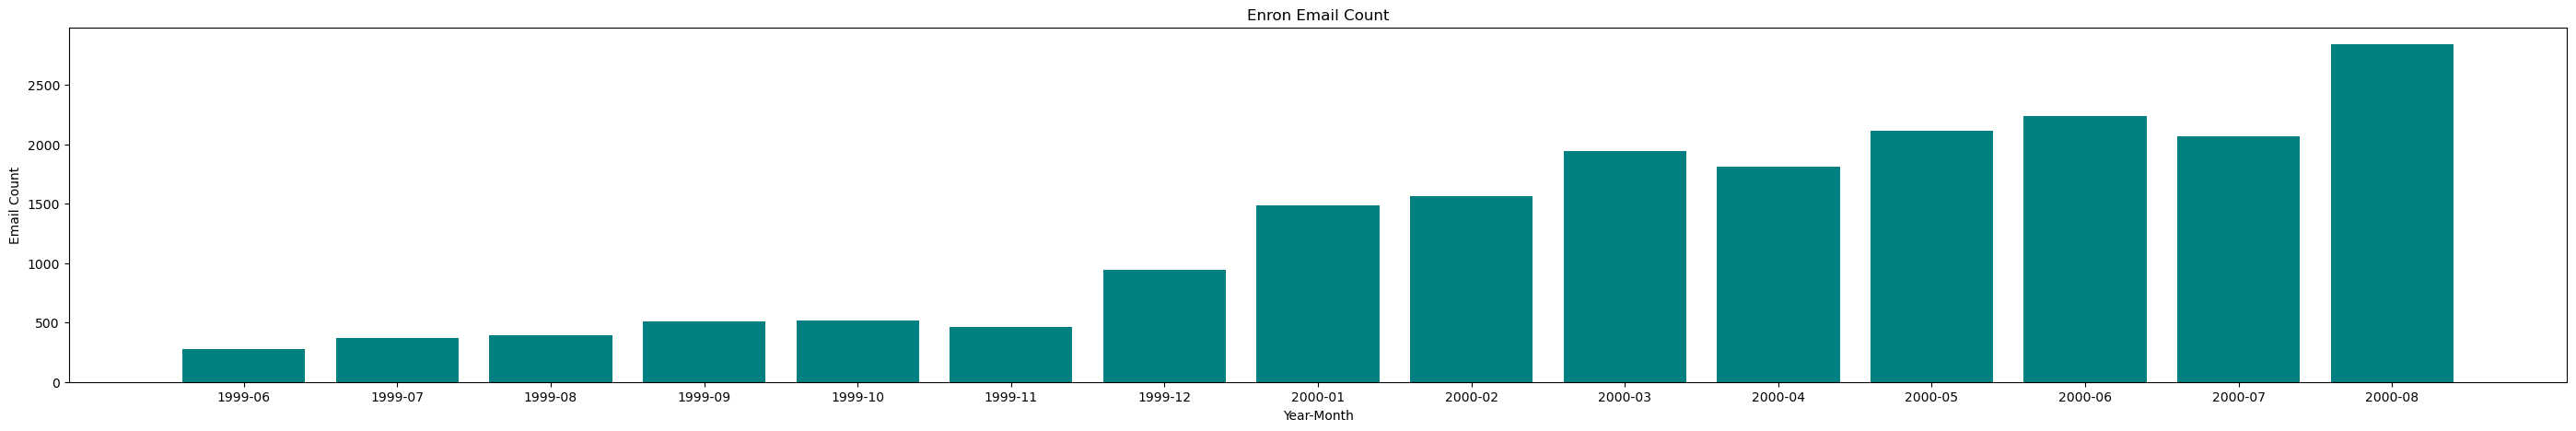

In [146]:
email_count_yearmonth= email_df.groupby(email_df['year-month'])[['Subject']].count()
email_count_yearmonth.reset_index(inplace=True)

# Create bar chart
plt.figure(figsize=(35, 5))
plt.bar(email_count_yearmonth['year-month'], email_count_yearmonth['Subject'], color='teal')

# Add labels and title

plt.xlabel('Year-Month')
plt.ylabel('Email Count')
plt.title('Enron Email Count')

# Show the plot
plt.show()

# Email Cleanup

In [147]:
# just took the raw dataset from enron_cleaned_emails_with_cleaned_body.csv
# no cleanup performed.

import nltk
# nltk.download()
# nltk.download('stopwords')

from nltk.corpus import stopwords

set(stopwords.words("english"))

import gensim
from gensim import corpora
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.stem.porter import PorterStemmer

# Import the relevant libraries required for Section 1
import os # Required for directory traversal
import pandas as pd
import email
from email import policy
from email.parser import BytesParser
from collections import defaultdict
from itertools import islice
import numpy as np
import regex as re

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [148]:
# Find Stop Words
from sklearn.feature_extraction.text import TfidfVectorizer 

# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 

# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(email_df['Clean_Body2'])

# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 

# place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False,inplace=True)
df.reset_index(inplace=True)

adhoc_stopword = df[df['tfidf']==0]['index'].to_list()

In [436]:
# Find Stop Words
from sklearn.feature_extraction.text import TfidfVectorizer 

def extract_stopword(text_df):
    # settings that you use for count vectorizer will go here 
    tfidf_vectorizer=TfidfVectorizer(use_idf=True) 

    # just send in all your docs here 
    tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(text_df)

    # get the first vector out (for the first document) 
    first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 

    # place tf-idf values in a pandas data frame 
    df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
    df.sort_values(by=["tfidf"],ascending=False,inplace=True)
    df.reset_index(inplace=True)

    adhoc_stopword = df[df['tfidf']==0]['index'].to_list()
    return adhoc_stopword, df

In [427]:
pre_adhoc_stopword, df = extract_stopword(email_df['Clean_Body2'])

In [428]:
during_adhoc_stopword, df = extract_stopword(email_df_during['Clean_Body2'])

In [437]:
post_adhoc_stopword, df = extract_stopword(email_df_post['Clean_Body2'])

In [438]:
df

,index,tfidf
0,emw,0.611290
1,publish,0.388389
2,website,0.356810
3,view,0.329942
4,available,0.295016
...,...,...
41576,full,0.000000
41577,fullblown,0.000000
41578,fullbodie,0.000000
41579,fullcolor,0.000000


In [579]:
pre_stop = set(stopwords.words('english'))
print(len(pre_stop))
pre_stop.update(("to"
                 ,"cc"
                 ,"subject"
                 ,"http"
                 ,"from"
                 ,"sent"
                 ,"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"
                 ,'ee'
                 ,'com'
                 ,'e'
                 ,'www'
                 ,'com'
                 ,'asp'
                 ,'hotmail'
                 ,'net'
                 ,'would'
                 ,'hou'
                 ,'enron'
                 ,'ect'
                 ,'pm'
                 ,'message'
                ,'please'
                ,'know'
                ,'font'
                ,'td'
                ,'tr'
                ,'p'
                ,'b'
                ,'click'
                ,'corp'
                 ,'time'
                ,"mail" 
                ,"u"
                ,"na"
                ,"forwarded",
                'october',
                'thanks',
                'mailto',
                'monday',
                'let',
                'get',
                'image',
                'one',
                'said',
                'year',
                'need',
                'u',
                'x',
                'said',
                'type',
                'id',
                'date',
                'sc',
                'hour',
                'ect',
                'br',
                'align',
                'right',
                'class',
                'width',
                'href',
                'face',
                'november',
                'size',
                'pt',
                'arial',
                'week',
                'html'
                ,'helvetica'
                ,'may'
                ,'enronxgate'
                ,'a'
                ,'b'
                ,'c'
                ,'d'
                ,'e'
                ,'f'
                ,'g'
                ,'h'
                ,'i'
                ,'j'
                ,'k'
                ,'l'
                ,'m'
                ,'n'
                ,'o'
                ,'p'
                ,'q'
                ,'r'
                ,'s'
                ,'t'
                ,'u'
                ,'v'
                ,'w'
                ,'x'
                ,'y'
                ,'z'


                 ))
print(len(pre_stop))
pre_stop.update(pre_adhoc_stopword)
print(len(pre_stop))
print(len(pre_adhoc_stopword))

179
257


AttributeError: 'set' object has no attribute 'append'

In [578]:
55985+257

56242

In [504]:
during_stop = set(stopwords.words('english'))
during_stop.update(("to"
                 ,"cc"
                 ,"subject"
                 ,"http"
                 ,"from"
                 ,"sent"
                 ,"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"
                 ,'ee'
                 ,'com'
                 ,'e'
                 ,'www'
                 ,'com'
                 ,'asp'
                 ,'hotmail'
                 ,'net'
                 ,'would'
                 ,'hou'
                 ,'enron'
                 ,'ect'
                 ,'pm'
                 ,'message'
                ,'please'
                ,'know'
                ,'font'
                ,'td'
                ,'tr'
                ,'p'
                ,'b'
                ,'click'
                ,'corp'
                 ,'time'
                ,"mail" 
                ,"u"
                ,"na"
                ,"forwarded",
                'october',
                'thanks',
                'mailto',
                'monday',
                'let',
                'get',
                'image',
                'one',
                'said',
                'year',
                'need',
                'u',
                'x',
                'said',
                'type',
                'id',
                'date',
                'sc',
                'hour',
                'ect',
                'br',
                'align',
                'right',
                'class',
                'width',
                'href',
                'face',
                'november',
                'size',
                'pt',
                'arial',
                'week',
                'html'
                ,'helvetica'
                ,'may'
                ,'enronxgate'
                ,'a'
                ,'b'
                ,'c'
                ,'d'
                ,'e'
                ,'f'
                ,'g'
                ,'h'
                ,'i'
                ,'j'
                ,'k'
                ,'l'
                ,'m'
                ,'n'
                ,'o'
                ,'p'
                ,'q'
                ,'r'
                ,'s'
                ,'t'
                ,'u'
                ,'v'
                ,'w'
                ,'x'
                ,'y'
                ,'z'


                 ))
during_stop.update(during_adhoc_stopword)
len(during_stop)

109902

In [505]:
post_stop = set(stopwords.words('english'))
post_stop.update(("to"
                 ,"cc"
                 ,"subject"
                 ,"http"
                 ,"from"
                 ,"sent"
                 ,"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"
                 ,'ee'
                 ,'com'
                 ,'e'
                 ,'www'
                 ,'com'
                 ,'asp'
                 ,'hotmail'
                 ,'net'
                 ,'would'
                 ,'hou'
                 ,'enron'
                 ,'ect'
                 ,'pm'
                 ,'message'
                ,'please'
                ,'know'
                ,'font'
                ,'td'
                ,'tr'
                ,'p'
                ,'b'
                ,'click'
                ,'corp'
                 ,'time'
                ,"mail" 
                ,"u"
                ,"na"
                ,"forwarded",
                'october',
                'thanks',
                'mailto',
                'monday',
                'let',
                'get',
                'image',
                'one',
                'said',
                'year',
                'need',
                'u',
                'x',
                'said',
                'type',
                'id',
                'date',
                'sc',
                'hour',
                'ect',
                'br',
                'align',
                'right',
                'class',
                'width',
                'href',
                'face',
                'november',
                'size',
                'pt',
                'arial',
                'week',
                'html'
                ,'helvetica'
                ,'may'
                ,'enronxgate'
                ,'a'
                ,'b'
                ,'c'
                ,'d'
                ,'e'
                ,'f'
                ,'g'
                ,'h'
                ,'i'
                ,'j'
                ,'k'
                ,'l'
                ,'m'
                ,'n'
                ,'o'
                ,'p'
                ,'q'
                ,'r'
                ,'s'
                ,'t'
                ,'u'
                ,'v'
                ,'w'
                ,'x'
                ,'y'
                ,'z'


                 ))
post_stop.update(post_adhoc_stopword)
len(post_stop)

41733

In [402]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.stem.porter import PorterStemmer

from gensim.parsing.preprocessing import *

def clean(text, stop):
    
 
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    porter= PorterStemmer()
    
    text=text.rstrip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #stem = " ".join(porter.stem(token) for token in normalized.split())
    
    return normalized


def topic_model_v1(enron_uncleaned_emails, sample=10000, num_topics=4, eng_stopwords=''):
    analysis_df=enron_uncleaned_emails[['From', 'To', 'Date','Clean_Body2']].dropna().copy()
    sub_df=analysis_df.sample(min(sample,len(analysis_df)))

    text_clean=[]
    for text in sub_df['Clean_Body2']:
        text_clean.append(clean(text, eng_stopwords).split())

    dictionary = corpora.Dictionary(text_clean)
    text_term_matrix = [dictionary.doc2bow(text) for text in text_clean]

    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(text_term_matrix, num_topics=num_topics, id2word = dictionary, passes=30)

    def clean_text(text):
        #text = BeautifulSoup(text, 'html.parser').get_text()
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        words = text.lower().split()
        words = [w for w in words if w not in eng_stopwords]
        return ' '.join(words)

    analysis_df["clean_content"]=analysis_df.Clean_Body2.apply(clean_text)

    wordvector = TfidfVectorizer(analyzer='word', stop_words='english', max_df=0.4, min_df=5)
    short_analysis=analysis_df.sample( min(5000,len(analysis_df)))
    wordvector_fit = wordvector.fit_transform(short_analysis.clean_content)
    feature = wordvector.get_feature_names_out()

    N = num_topics
    clf = KMeans(n_clusters=N, 
                max_iter=50, 
                init='k-means++', 
                n_init=1)
    labels = clf.fit_predict(wordvector_fit)

    wordvector_fit_2d = wordvector_fit.todense()
    pca = PCA(n_components=2).fit(np.asarray(wordvector_fit_2d))
    datapoint = pca.transform(np.asarray(wordvector_fit_2d))

    return ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit

import nltk
nltk.download('wordnet')
from wordcloud import WordCloud
def gen_wordcloud(df_subset, stop):
    msg_strings = df_subset.Clean_Body2.values
    CUSTOM_FILTER = [lambda x: x.lower(), strip_punctuation, 
                 strip_multiple_whitespaces, strip_numeric, 
                 remove_stopwords, strip_short]
    msg_tokenized = [preprocess_string(x,CUSTOM_FILTER) for x in msg_strings]
    wn = WordNetLemmatizer()
    msg_corpus = [[wn.lemmatize(w) for w in dd ] for dd in msg_tokenized]
    text = ' '.join([word for sublist in msg_corpus for word in sublist])
    stopwords = set(stop)
    wordcloud = WordCloud(stopwords=stopwords,background_color="white", max_words=40).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xantv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Find Topic across time

# To/from all important person - small audience

In [260]:
email_df.head()

,Unnamed: 0,From,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
0,0,elizabeth.sager@enron.com,robin.kittel@enron.com,1999-06-01 09:12:00+00:00,Enabling Agreement,Robin\n\nThanks for your voicemail - here is t...,1999,6,1999-06,internal,internal,1,14.0,robin voicemail final ercot agreement I m stil...,robin voicemail final ercot agreement I m stil...
1,1,sara.shackleton@enron.com,marie.heard@enron.com,1999-06-01 11:38:00+00:00,The Dispatch Printing Company,FYI\n---------------------- Forwarded by Sara ...,1999,6,1999-06,internal,internal,1,2.0,fyi sara shackletonhouect dale neuner je...,fyi sara shackleton hou ect dale neuner ...
2,2,mark.taylor@enron.com,elizabeth.sager@enron.com,1999-06-01 12:24:00+00:00,FYI,Western Power Market Stands 'Poised on the \nP...,1999,6,1999-06,internal,internal,1,2.0,western power market stand poise precipice acc...,western power market stand poise precipice acc...
3,3,tana.jones@enron.com,"carol.clair@enron.com, marie.heard@enron.com, ...",1999-06-01 13:08:00+00:00,Legal/Credit Meeting,The Legal/Credit Meeting scheduled for today i...,1999,6,1999-06,internal,internal,8,2.0,legalcredit meeting schedule today cancel due ...,legal credit meeting schedule today cancel due...
4,4,richard.sanders@enron.com,becky.stephens@enron.com,1999-06-01 13:36:00+00:00,Re: service of process,I have not recieved this document.\n\n\n\n\nBe...,1999,6,1999-06,internal,internal,1,1.0,recieve document becky stephensenron richar...,recieve document becky stephensenron rich...


In [261]:
poi_list = ''.join(str(x) for x in person_of_interest['Within Enron - Small'])
poi_list

'tana.jones@enron.comsally.beck@enron.commark.taylor@enron.comsara.shackleton@enron.comvince.kaminski@enron.comsusan.scott@enron.comdavid.delainey@enron.combenjamin.rogers@enron.comdaren.farmer@enron.comsteven.kean@enron.comjeff.dasovich@enron.comted.murphy@enron.comrichard.sanders@enron.comjohn.lavorato@enron.comgerald.nemec@enron.comchris.germany@enron.comelizabeth.sager@enron.commark.haedicke@enron.commaureen.mcvicker@enron.comtobin.carlson@enron.com'

In [568]:
df = email_df[
                        #  (
                        #      (email_df['From'].str.contains('|'.join(poi_list )).any())|
                        #      (email_df['To'].str.contains('|'.join(poi_list )).any())
                        #  )
                        # &
                        (email_df['Clean_Body2']!='')
                         ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = pre_stop)
print(ldamodel.print_topics(num_topics=2, num_words=20))

(20323, 15)
[(1, '0.179*"agreement" + 0.080*"work" + 0.075*"review" + 0.074*"draft" + 0.074*"attach" + 0.074*"legal" + 0.065*"contact" + 0.059*"comment" + 0.056*"group" + 0.053*"change" + 0.033*"version" + 0.023*"final" + 0.020*"think" + 0.018*"still" + 0.016*"forward" + 0.011*"jeff" + 0.009*"therefore" + 0.008*"two" + 0.007*"redline" + 0.006*"trade"'), (0, '0.154*"price" + 0.127*"david" + 0.107*"trade" + 0.097*"schedule" + 0.095*"jones" + 0.058*"point" + 0.049*"two" + 0.027*"attach" + 0.023*"comment" + 0.018*"member" + 0.018*"capital" + 0.015*"next" + 0.015*"still" + 0.014*"respond" + 0.014*"bob" + 0.013*"change" + 0.013*"june" + 0.012*"put" + 0.012*"review" + 0.011*"much"')]


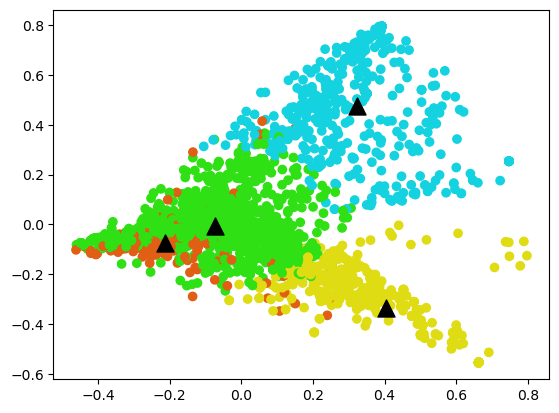

In [569]:
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()


In [570]:
overall_topic = ''
for idx, topic in ldamodel.show_topics(formatted=False, num_words=10):
    print('Topic: {} \nWords: {}'.format(idx, ','.join([w[0] for w in topic])))
    overall_topic = overall_topic +','.join([w[0] for w in topic])

Topic: 0 
Words: price,david,trade,schedule,jones,point,two,attach,comment,member
Topic: 1 
Words: agreement,work,review,draft,attach,legal,contact,comment,group,change
Topic: 2 
Words: steve,jeff,attach,james,june,group,meeting,brian,review,respond
Topic: 3 
Words: think,change,work,meeting,next,forward,much,elizabeth,group,put


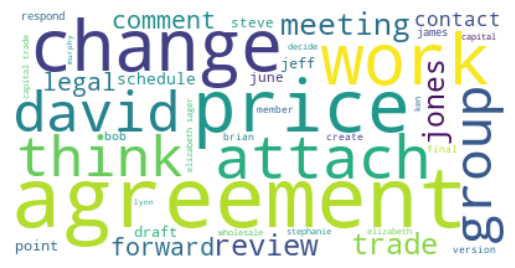

In [571]:
gen_wordcloud(df, pre_stop)

In [580]:
community_pre_stop = pre_stop
print(len(community_pre_stop))
community_pre_stop.update(overall_topic)
print(len(community_pre_stop))

257
258


In [582]:
for word in overall_topic:
    if word not in community_pre_stop:
        print(word)

In [572]:
overall_topic

'price,david,trade,schedule,jones,point,two,attach,comment,memberagreement,work,review,draft,attach,legal,contact,comment,group,changesteve,jeff,attach,james,june,group,meeting,brian,review,respondthink,change,work,meeting,next,forward,much,elizabeth,group,put'

In [517]:
df = email_df_during[
                        #  (
                        #      (email_df['From'].str.contains('|'.join(poi_list )).any())|
                        #      (email_df['To'].str.contains('|'.join(poi_list )).any())
                        #  )
                        # &
                        (email_df_during['Clean_Body2']!='')
                         ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = during_stop)
print(ldamodel.print_topics(num_topics=4, num_words=10))
overall_topic = ''
for idx, topic in ldamodel.show_topics(formatted=False, num_words=10):
    print('Topic: {} \nWords: {}'.format(idx, ','.join([w[0] for w in topic])))
    overall_topic = overall_topic +','.join([w[0] for w in topic])

(56539, 14)
[(0, '0.155*"power" + 0.090*"market" + 0.058*"order" + 0.047*"member" + 0.038*"customer" + 0.035*"new" + 0.034*"commission" + 0.026*"use" + 0.025*"could" + 0.023*"must"'), (1, '0.123*"trading" + 0.077*"credit" + 0.055*"limit" + 0.048*"approval" + 0.047*"month" + 0.047*"bank" + 0.046*"change" + 0.038*"new" + 0.032*"receive" + 0.032*"account"'), (2, '0.089*"information" + 0.062*"service" + 0.060*"change" + 0.054*"include" + 0.051*"use" + 0.048*"new" + 0.048*"send" + 0.046*"business" + 0.040*"provide" + 0.035*"system"'), (3, '0.158*"send" + 0.094*"want" + 0.082*"like" + 0.054*"could" + 0.051*"well" + 0.050*"group" + 0.043*"take" + 0.037*"today" + 0.034*"thing" + 0.029*"september"')]
Topic: 0 
Words: power,market,order,member,customer,new,commission,use,could,must
Topic: 1 
Words: trading,credit,limit,approval,month,bank,change,new,receive,account
Topic: 2 
Words: information,service,change,include,use,new,send,business,provide,system
Topic: 3 
Words: send,want,like,could,well,

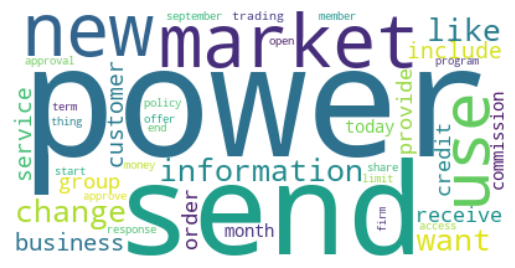

In [518]:
gen_wordcloud(email_df_during, during_stop)

In [519]:
community_during_stop = during_stop
community_during_stop.update(overall_topic)

In [520]:
df = email_df_post[
                        #  (
                        #      (email_df['From'].str.contains('|'.join(poi_list )).any())|
                        #      (email_df['To'].str.contains('|'.join(poi_list )).any())
                        #  )
                        # &
                        (email_df_post['Clean_Body2']!='')
                         ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=100000, num_topics=4, eng_stopwords = post_stop)
print(ldamodel.print_topics(num_topics=4, num_words=10))
overall_topic = ''
for idx, topic in ldamodel.show_topics(formatted=False, num_words=10):
    print('Topic: {} \nWords: {}'.format(idx, ','.join([w[0] for w in topic])))
    overall_topic = overall_topic +','.join([w[0] for w in topic])

(14867, 14)
[(0, '0.576*"report" + 0.423*"name" + 0.000*"publish" + 0.000*"available" + 0.000*"view" + 0.000*"website" + 0.000*"emw"'), (1, '0.972*"view" + 0.027*"emw" + 0.000*"report" + 0.000*"available" + 0.000*"publish" + 0.000*"name" + 0.000*"website"'), (2, '0.405*"website" + 0.338*"name" + 0.256*"publish" + 0.000*"report" + 0.000*"available" + 0.000*"emw" + 0.000*"view"'), (3, '0.999*"available" + 0.000*"report" + 0.000*"publish" + 0.000*"name" + 0.000*"view" + 0.000*"website" + 0.000*"emw"')]
Topic: 0 
Words: report,name,publish,available,view,website,emw
Topic: 1 
Words: view,emw,report,available,publish,name,website
Topic: 2 
Words: website,name,publish,report,available,emw,view
Topic: 3 
Words: available,report,publish,name,view,website,emw


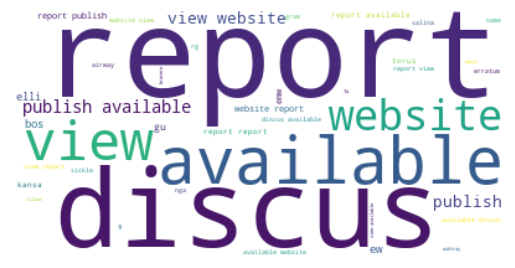

In [521]:
gen_wordcloud(email_df_post, post_stop)

In [522]:
community_post_stop = post_stop
community_post_stop.update(overall_topic)

#### by Community

In [583]:
email_df_during['Community'].unique()

array([ 8.,  1.,  7.,  0., 15.,  6., 10.,  9.,  2.])

In [604]:
poi = pd.read_csv('person_of_interest_allcategories_betweenness.csv')
person_of_interest = poi[poi['PERIOD']=='During_crisis'][['Within Enron - Small']]
poi_during = person_of_interest['Within Enron - Small'].values

In [607]:
for poi_p in poi_pre:
    if poi_p in poi_during:
        print(poi_p)

tana.jones@enron.com
sally.beck@enron.com
mark.taylor@enron.com
sara.shackleton@enron.com
vince.kaminski@enron.com
susan.scott@enron.com
steven.kean@enron.com
jeff.dasovich@enron.com
john.lavorato@enron.com
gerald.nemec@enron.com
elizabeth.sager@enron.com


In [612]:
email_df_during[email_df_during['Clean_Body2'].str.contains('ectect')].to_csv('Clean_Body2_ectec_during.csv')

#### 15

(5511, 14)


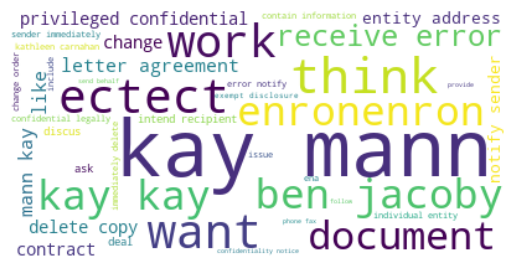

In [602]:
distinct_community = 15
df = email_df_during[      
        (email_df_during['Clean_Body2']!='')
        &
        (email_df_during['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_during_stop)
gen_wordcloud(df, community_pre_stop)

In [603]:
print(df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique())
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

['kay.mann@enron.com']


,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
From,,,,,,,,,,,,,
kay.mann@enron.com,3878,3878,3878,3774,3878,3878,3878,3878,3878,3878,3878,3878,3878


#### 10

(7990, 14)


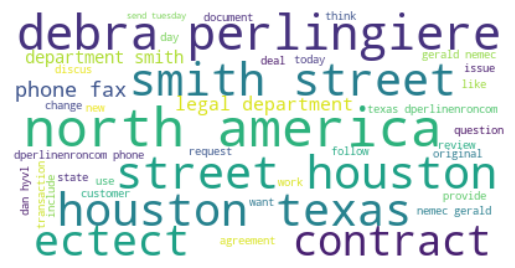

In [600]:
distinct_community = 10
df = email_df_during[      
        (email_df_during['Clean_Body2']!='')
        &
        (email_df_during['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_during_stop)
gen_wordcloud(df, community_pre_stop)

In [601]:
print(df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique())
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

['debra.perlingiere@enron.com' 'gerald.nemec@enron.com'
 'chris.foster@enron.com' 'dan.hyvl@enron.com' 'barry.tycholiz@enron.com']


,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
From,,,,,,,,,,,,,
barry.tycholiz@enron.com,452,452,452,452,452,452,452,452,452,452,452,452,452
chris.foster@enron.com,147,147,147,140,147,147,147,147,147,147,147,147,147
dan.hyvl@enron.com,649,649,649,647,649,649,649,649,649,649,649,649,649
debra.perlingiere@enron.com,1824,1824,1824,1632,1824,1824,1824,1824,1824,1824,1824,1824,1824
gerald.nemec@enron.com,1298,1298,1298,1283,1298,1298,1298,1298,1298,1298,1298,1298,1298


#### 9

(3122, 14)


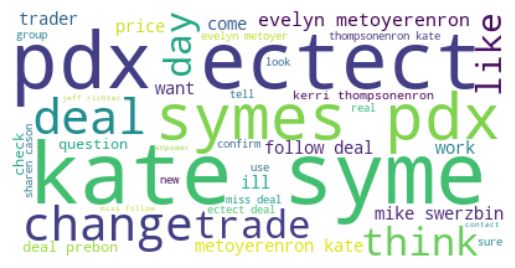

In [598]:
distinct_community = 9
df = email_df_during[      
        (email_df_during['Clean_Body2']!='')
        &
        (email_df_during['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_during_stop)
gen_wordcloud(df, community_pre_stop)

In [599]:
print(df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique())
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

['kate.symes@enron.com']


,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
From,,,,,,,,,,,,,
kate.symes@enron.com,1516,1516,1516,1509,1516,1516,1516,1516,1516,1516,1516,1516,1516


#### 8

(11405, 14)


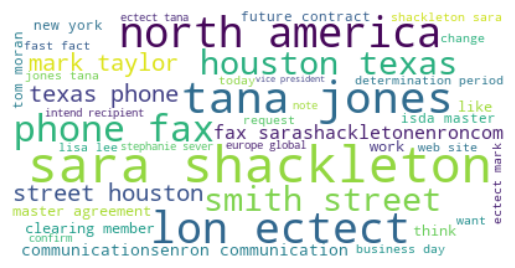

In [596]:
distinct_community = 8
df = email_df_during[      
        (email_df_during['Clean_Body2']!='')
        &
        (email_df_during['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_during_stop)
gen_wordcloud(df, community_pre_stop)

In [597]:
print(df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique())
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

['sara.shackleton@enron.com' 'tana.jones@enron.com'
 'mark.taylor@enron.com']


,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
From,,,,,,,,,,,,,
mark.taylor@enron.com,642,642,642,632,642,642,642,642,642,642,642,642,642
sara.shackleton@enron.com,2095,2095,2095,2086,2095,2095,2095,2095,2095,2095,2095,2095,2095
tana.jones@enron.com,2249,2249,2249,2243,2249,2249,2249,2249,2249,2249,2249,2249,2249


#### 7

(3102, 14)


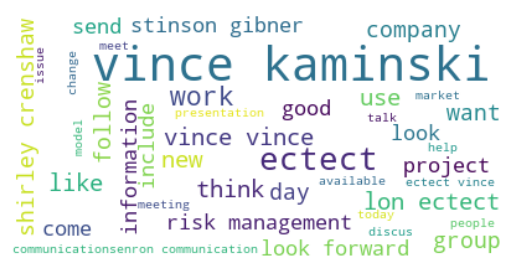

In [613]:
distinct_community = 7
df = email_df_during[      
        (email_df_during['Clean_Body2']!='')
        &
        (email_df_during['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_during_stop)
gen_wordcloud(df, community_pre_stop)

In [614]:
print(df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique())
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

['vince.kaminski@enron.com' 'david.delainey@enron.com'
 'ted.murphy@enron.com' 'benjamin.rogers@enron.com']


,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
From,,,,,,,,,,,,,
benjamin.rogers@enron.com,1,1,1,0,1,1,1,1,1,1,1,1,1
david.delainey@enron.com,4,4,4,3,4,4,4,4,4,4,4,4,4
ted.murphy@enron.com,4,4,4,4,4,4,4,4,4,4,4,4,4
vince.kaminski@enron.com,2322,2322,2322,2234,2322,2322,2322,2322,2322,2322,2322,2322,2322


In [616]:
df.to_csv('during_vincent.csv')

#### 6

(8780, 14)


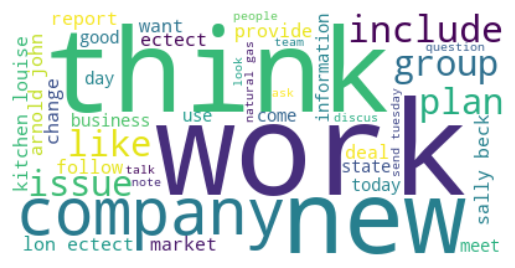

In [592]:
distinct_community = 6
df = email_df_during[      
        (email_df_during['Clean_Body2']!='')
        &
        (email_df_during['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_during_stop)
gen_wordcloud(df, community_pre_stop)

In [593]:
print(df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique())
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

['sally.beck@enron.com' 'john.arnold@enron.com' 'john.lavorato@enron.com'
 'louise.kitchen@enron.com']


,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
From,,,,,,,,,,,,,
john.arnold@enron.com,1246,1246,1246,986,1246,1246,1246,1246,1246,1246,1246,1246,1246
john.lavorato@enron.com,705,705,705,531,705,705,705,705,705,705,705,705,705
louise.kitchen@enron.com,557,557,557,528,557,557,557,557,557,557,557,557,557
sally.beck@enron.com,973,973,973,972,973,973,973,973,973,973,973,973,973


#### 2

(1968, 14)


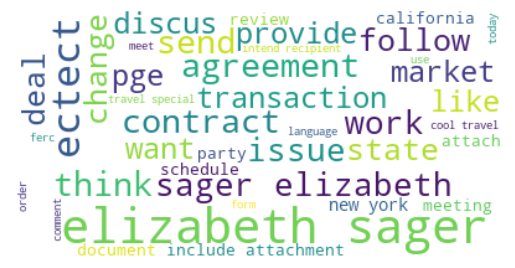

In [590]:
distinct_community = 2
df = email_df_during[      
        (email_df_during['Clean_Body2']!='')
        &
        (email_df_during['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_during_stop)
gen_wordcloud(df, community_pre_stop)

In [591]:
print(df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique())
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

['elizabeth.sager@enron.com']


,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
From,,,,,,,,,,,,,
elizabeth.sager@enron.com,1044,1044,1044,1034,1044,1044,1044,1044,1044,1044,1044,1044,1044


#### 1

(13488, 14)


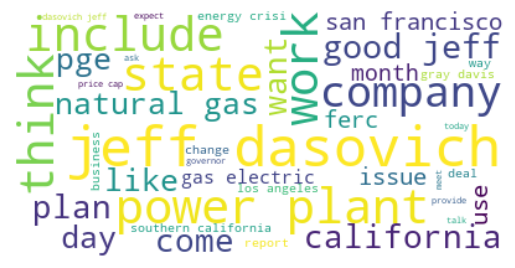

In [587]:
distinct_community = 1
df = email_df_during[      
        (email_df_during['Clean_Body2']!='')
        &
        (email_df_during['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_during_stop)
gen_wordcloud(df, community_pre_stop)

In [589]:
print(df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique())
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

['steven.kean@enron.com' 'jeff.dasovich@enron.com' 'd..steffes@enron.com']


,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
From,,,,,,,,,,,,,
d..steffes@enron.com,973,973,973,971,973,973,973,973,973,973,973,973,973
jeff.dasovich@enron.com,5026,5026,5026,4571,5026,5026,5026,5026,5026,5026,5026,5026,5026
steven.kean@enron.com,1033,1033,1033,959,1033,1033,1033,1033,1033,1033,1033,1033,1033


#### 0

(1173, 14)


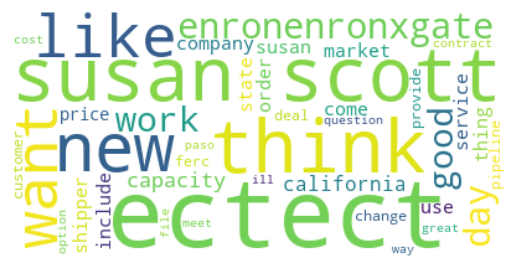

In [585]:
distinct_community = 0
df = email_df_during[      
        (email_df_during['Clean_Body2']!='')
        &
        (email_df_during['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_during_stop)
gen_wordcloud(df, community_pre_stop)

In [586]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
From,,,,,,,,,,,,,
susan.scott@enron.com,619,619,619,609,619,619,619,619,619,619,619,619,619


### Pre

In [605]:
poi = pd.read_csv('person_of_interest_allcategories_betweenness.csv')
person_of_interest = poi[poi['PERIOD']=='Pre_crisis'][['Within Enron - Small']]
person_of_interest['Within Enron - Small'].values

array(['tana.jones@enron.com', 'sally.beck@enron.com',
       'mark.taylor@enron.com', 'sara.shackleton@enron.com',
       'vince.kaminski@enron.com', 'susan.scott@enron.com',
       'david.delainey@enron.com', 'benjamin.rogers@enron.com',
       'daren.farmer@enron.com', 'steven.kean@enron.com',
       'jeff.dasovich@enron.com', 'ted.murphy@enron.com',
       'richard.sanders@enron.com', 'john.lavorato@enron.com',
       'gerald.nemec@enron.com', 'chris.germany@enron.com',
       'elizabeth.sager@enron.com', 'mark.haedicke@enron.com',
       'maureen.mcvicker@enron.com', 'tobin.carlson@enron.com'],
      dtype=object)

In [606]:
poi_pre = person_of_interest['Within Enron - Small'].values

#### 17

(1602, 15)


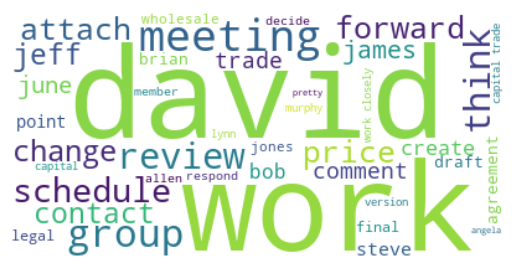

In [565]:
distinct_community = 17
df = email_df[      
        (email_df['Clean_Body2']!='')
        &
        (email_df['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_pre_stop)
gen_wordcloud(df, community_pre_stop)

In [566]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
From,,,,,,,,,,,,,,
david.delainey@enron.com,281,281,281,267,281,281,281,281,281,281,281,281,281,281
john.lavorato@enron.com,271,271,271,164,271,271,271,271,271,271,271,271,271,271
sally.beck@enron.com,413,413,413,411,413,413,413,413,413,413,413,413,413,413


In [567]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique()

array(['john.lavorato@enron.com', 'sally.beck@enron.com',
       'david.delainey@enron.com'], dtype=object)

#### 14

(1695, 15)


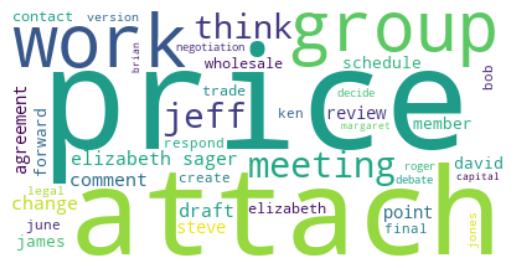

In [562]:
distinct_community = 14
df = email_df[      
        (email_df['Clean_Body2']!='')
        &
        (email_df['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_pre_stop)
gen_wordcloud(df, community_pre_stop)

In [563]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
From,,,,,,,,,,,,,,
elizabeth.sager@enron.com,364,364,364,361,364,364,364,364,364,364,364,364,364,364
jeff.dasovich@enron.com,89,89,89,76,89,89,89,89,89,89,89,89,89,89
maureen.mcvicker@enron.com,63,63,63,63,63,63,63,63,63,63,63,63,63,63
steven.kean@enron.com,227,227,227,215,227,227,227,227,227,227,227,227,227,227


In [564]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique()

array(['elizabeth.sager@enron.com', 'maureen.mcvicker@enron.com',
       'steven.kean@enron.com', 'jeff.dasovich@enron.com'], dtype=object)

#### 11

(1933, 15)


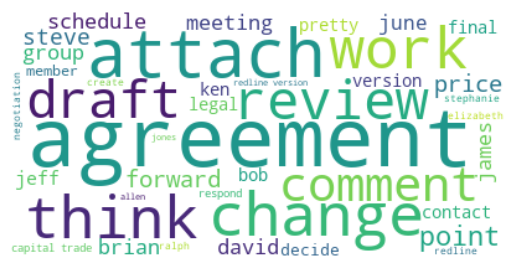

In [559]:
distinct_community = 11
df = email_df[      
        (email_df['Clean_Body2']!='')
        &
        (email_df['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_pre_stop)
gen_wordcloud(df, community_pre_stop)

In [560]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
From,,,,,,,,,,,,,,
gerald.nemec@enron.com,751,751,751,737,751,751,751,751,751,751,751,751,751,751
susan.scott@enron.com,548,548,548,542,548,548,548,548,548,548,548,548,548,548
tobin.carlson@enron.com,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [561]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique()

array(['gerald.nemec@enron.com', 'susan.scott@enron.com',
       'tobin.carlson@enron.com'], dtype=object)

#### 10

(1656, 15)


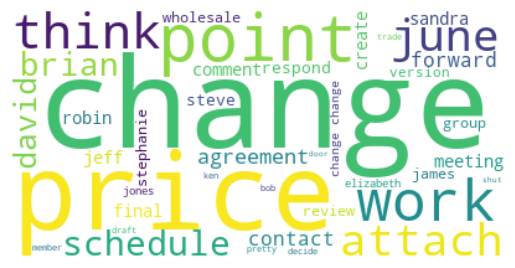

In [557]:
distinct_community = 10
df = email_df[      
        (email_df['Clean_Body2']!='')
        &
        (email_df['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_pre_stop)
gen_wordcloud(df, community_pre_stop)

In [558]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
From,,,,,,,,,,,,,,
chris.germany@enron.com,1184,1184,1184,1128,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184


#### 7

(912, 15)


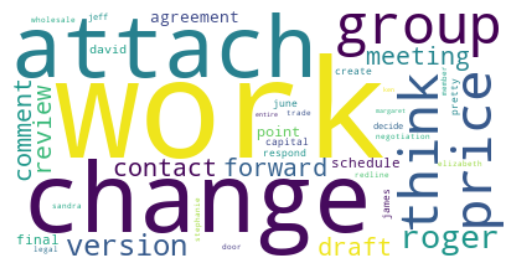

In [555]:
distinct_community = 7
df = email_df[      
        (email_df['Clean_Body2']!='')
        &
        (email_df['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_pre_stop)
gen_wordcloud(df, community_pre_stop)

In [556]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
From,,,,,,,,,,,,,,
benjamin.rogers@enron.com,511,511,511,242,511,511,511,511,511,511,511,511,511,511


#### 1

(1200, 15)


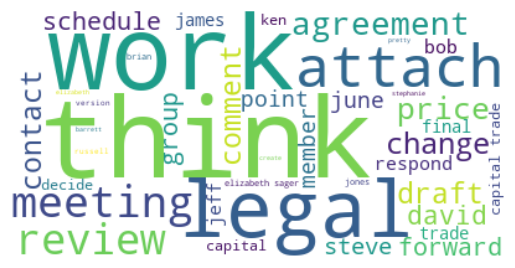

In [544]:
distinct_community = 1
df = email_df[      
        (email_df['Clean_Body2']!='')
        &
        (email_df['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_pre_stop)
gen_wordcloud(df, community_pre_stop)

In [545]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
From,,,,,,,,,,,,,,
mark.haedicke@enron.com,392,392,392,391,392,392,392,392,392,392,392,392,392,392
richard.sanders@enron.com,617,617,617,595,617,617,617,617,617,617,617,617,617,617


In [546]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique()

array(['richard.sanders@enron.com', 'mark.haedicke@enron.com'],
      dtype=object)

#### 2

(7681, 15)


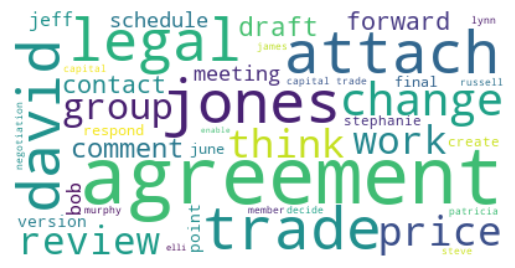

In [547]:
distinct_community = 2
df = email_df[      
        (email_df['Clean_Body2']!='')
        &
        (email_df['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_pre_stop)
gen_wordcloud(df, community_pre_stop)

In [548]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
From,,,,,,,,,,,,,,
mark.taylor@enron.com,1039,1039,1039,1029,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039
sara.shackleton@enron.com,1855,1855,1855,1852,1855,1855,1855,1855,1855,1855,1855,1855,1855,1855
tana.jones@enron.com,1725,1725,1725,1721,1725,1725,1725,1725,1725,1725,1725,1725,1725,1725
ted.murphy@enron.com,28,28,28,28,28,28,28,28,28,28,28,28,28,28


In [549]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)]['From'].unique()

array(['sara.shackleton@enron.com', 'mark.taylor@enron.com',
       'tana.jones@enron.com', 'ted.murphy@enron.com'], dtype=object)

#### 0

(1382, 15)


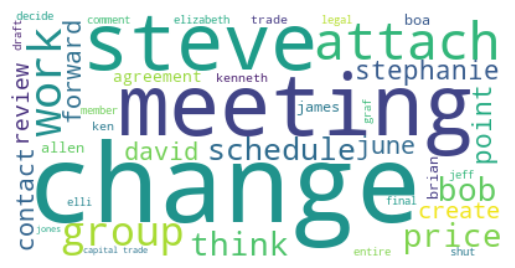

In [551]:
distinct_community = 0
df = email_df[      
        (email_df['Clean_Body2']!='')
        &
        (email_df['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_pre_stop)
gen_wordcloud(df, community_pre_stop)

In [552]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
From,,,,,,,,,,,,,,
daren.farmer@enron.com,383,383,383,380,383,383,383,383,383,383,383,383,383,383


#### 6

(2262, 15)


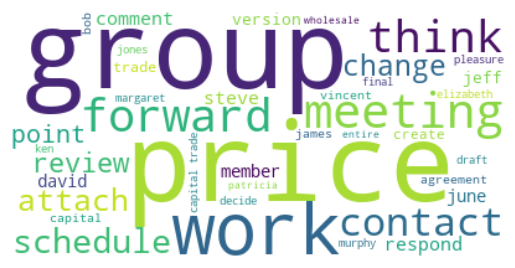

In [553]:
distinct_community = 6
df = email_df[      
        (email_df['Clean_Body2']!='')
        &
        (email_df['Community']==distinct_community)
            ] 
print(df.shape)
ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_pre_stop)
gen_wordcloud(df, community_pre_stop)

In [554]:
df[df['From'].isin(person_of_interest['Within Enron - Small'].values)].groupby('From').count()

,Unnamed: 0,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
From,,,,,,,,,,,,,,
vince.kaminski@enron.com,1627,1627,1627,1536,1627,1627,1627,1627,1627,1627,1627,1627,1627,1627


In [268]:
topic_summary = pd.DataFrame()

for distinct_community in email_df['Community'].unique():
    print(distinct_community)

    df = email_df[
    (email_df['Clean_Body2']!='')
    &
    (email_df['Community']==distinct_community)
        ] 
    
    ldamodel, datapoint,labels, clf,pca, feature, wordvector_fit_2d= topic_model_v1(df , sample=1000, num_topics=4, eng_stopwords = community_pre_stop)

    topic_community = ''
    for idx, topic in ldamodel.show_topics(formatted=False, num_words=10):
        print('Topic: {} \nWords: {}'.format(idx, ','.join([w[0] for w in topic])))
        topic_community = topic_community +','.join([w[0] for w in topic])
    
    topic_community = [s.strip() for s in topic_community.split(',') if s]
    temp_topic_summary = pd.DataFrame()
    temp_topic_summary['topic'] = topic_community
    temp_topic_summary['category']='topic_community_'+str(distinct_community)

    topic_summary = pd.concat([topic_summary,temp_topic_summary])

14.0
Topic: 0 
Words: j,sandra,q,entire,pretty,margaret,closely,shut,kenneth,dede
Topic: 1 
Words: roger,f,v,robin,geoff,therefore,kenneth,stephanie,j,typo
Topic: 2 
Words: agreement,negotiation,enable,brian,allen,ercot,substantive,patricia,therefore,cox
Topic: 3 
Words: debate,resource,marty,curtis,baker,therefore,lynn,margaret,subcommittee,harlan
2.0
Topic: 0 
Words: resource,russell,entire,brian,shut,sandra,door,barrett,v,harlan
Topic: 1 
Words: therefore,pretty,enable,f,ralph,closely,baker,q,vincent,geoff
Topic: 2 
Words: j,lynn,stephanie,voicemail,shut,roger,negotiation,angela,robin,patricia
Topic: 3 
Words: agreement,patricia,murphy,negotiation,baker,margaret,ninedoc,debate,marty,griffin
1.0
Topic: 0 
Words: brian,v,stephanie,pretty,f,entire,debate,voicemail,ralph,closely
Topic: 1 
Words: russell,negotiation,patricia,enable,kenneth,murphy,angela,typo,margaret,sandra
Topic: 2 
Words: agreement,barrett,robin,ercot,f,edmond,entire,closely,marty,baker
Topic: 3 
Words: j,resource,ther

In [269]:
topic_summary.to_csv('topic_summary__pre_crisis__WithinEnron__Small__Betweenness.csv', index=False)

In [270]:
topic_summary_poi = pd.read_csv('topic_summary__pre_crisis__WithinEnron__Small__Betweenness__poi.csv')

In [273]:
topic_summary[topic_summary['category']=='overall']

,topic,category
0,price,overall
1,change,overall
2,think,overall
3,point,overall
4,two,overall
...,...,...
72,c,overall
73,think,overall
74,group,overall
75,h,overall


In [274]:
topic_summary_poi[topic_summary_poi['category']=='overall']

,topic,category
0,change,overall
1,put,overall
2,trade,overall
3,schedule,overall
4,bob,overall
...,...,...
72,create,overall
73,meeting,overall
74,ken,overall
75,therefore,overall


# Suspicious email detection

### Method 1

In [275]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import spacy

# Load spaCy model for preprocessing
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])


In [294]:
df = email_df[
    #     (
    #         (email_df['From'].str.contains('|'.join(poi_list )).any())|
    #         (email_df['To'].str.contains('|'.join(poi_list )).any())
    #     )
    # &
    (email_df['Clean_Body2']!='')
    &
    (email_df['Community']==14)
        ] 
print(df.shape)


(1695, 15)


In [293]:
distinct_community

7.0

In [295]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Clean_Body2'])
X_scaled = StandardScaler().fit_transform(X.toarray())

In [303]:
X

<1695x18782 sparse matrix of type '<class 'numpy.float64'>'
	with 160453 stored elements in Compressed Sparse Row format>

In [301]:
len(df['Clean_Body2'])

1695

In [302]:
df['Clean_Body2']

0        robin voicemail final ercot agreement I m stil...
6        kind forward slip ever nearer precipice mental...
11       fyi stand ready stand firm elizabeth sager hou...
20       sorry delay respond assistant brenda whitehead...
24              sure copy letter ask brenda forward brenda
                               ...                        
20349    fyi jeff dasovich sfo ees      pm mary hain   ...
20353    greeting wow lot fun eh do not know like witho...
20354    million agree humor need right though short su...
20357                      already give mine sign confused
20359                                 see attach today wsj
Name: Clean_Body2, Length: 1695, dtype: object

In [304]:
X_scaled

array([[-0.0399763 , -0.02429648, -0.02429648, ..., -0.02429648,
        -0.02429648, -0.04954347],
       [-0.0399763 , -0.02429648, -0.02429648, ..., -0.02429648,
        -0.02429648, -0.04954347],
       [-0.0399763 , -0.02429648, -0.02429648, ..., -0.02429648,
        -0.02429648, -0.04954347],
       ...,
       [-0.0399763 , -0.02429648, -0.02429648, ..., -0.02429648,
        -0.02429648, -0.04954347],
       [-0.0399763 , -0.02429648, -0.02429648, ..., -0.02429648,
        -0.02429648, -0.04954347],
       [-0.0399763 , -0.02429648, -0.02429648, ..., -0.02429648,
        -0.02429648, -0.04954347]])

In [312]:
# Apply DBSCAN
dbscan = DBSCAN(eps=50, min_samples=100)  # Parameters may need tuning
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the original emails
emails_with_clusters = pd.DataFrame({'From': df['From'],'To': df['To'],'Date': df['Date'],'From_Source': df['From_Source'],'To_Source': df['To_Source'],'Email': df['Body'], 'Cluster': clusters})
print(emails_with_clusters[(emails_with_clusters['Cluster']>-1)].shape)
df2=emails_with_clusters[(emails_with_clusters['Cluster']>=0)]

(142, 7)


In [313]:
df2

,From,To,Date,From_Source,To_Source,Email,Cluster
20,elizabeth.sager@enron.com,nicola.beales@enron.com,1999-06-02 09:55:00+00:00,internal,internal,Sorry for the delay in responding. I am havin...,0
24,elizabeth.sager@enron.com,nicola.beales@enron.com,1999-06-02 13:02:00+00:00,internal,internal,"Sure. By copy of this letter, I am asking bre...",0
62,jenny.helton@enron.com,"peter.keohane@enron.com, elizabeth.sager@enron...",1999-06-07 14:42:00+00:00,internal,internal,Please send me any calendar updates on a weekl...,0
133,elizabeth.sager@enron.com,brenda.whitehead@enron.com,1999-06-15 08:56:00+00:00,internal,internal,---------------------- Forwarded by Elizabeth ...,0
137,elizabeth.sager@enron.com,christi.nicolay@enron.com,1999-06-15 11:00:00+00:00,internal,internal,Here are my comments\nWhat do you think\neas\n,0
...,...,...,...,...,...,...,...
20273,jeff.dasovich@enron.com,9069876@skytel.com,2000-08-30 12:32:00+00:00,internal,external,"plz call asap re: mary hain. thanks, jeff 41...",0
20310,jeff.dasovich@enron.com,csellers@gunder.com,2000-08-30 15:41:00+00:00,internal,external,C1 was up 10 points today. I figure that mean...,0
20313,jeff.dasovich@enron.com,cameron@perfect.com,2000-08-30 15:48:00+00:00,internal,external,C1 was up 10 points today. I figure that mean...,0
20314,jeff.dasovich@enron.com,csellers@perfect.com,2000-08-30 15:49:00+00:00,internal,external,C1 was up 10 points today. I figure that mean...,0


In [133]:
df2.to_csv('emails_with_clusters_Pre_crisis.csv', index=False)

In [ ]:
df = enron_cleaned_emails[(enron_cleaned_emails['year-month'].isin(During_crisis))
                         &(enron_cleaned_emails['Receiver_Count']<=5)
                         &
                        (enron_cleaned_emails['Cleaned_Body2']!='')
                         ] 
X = vectorizer.fit_transform(df['Cleaned_Body2'])
X_scaled = StandardScaler().fit_transform(X.toarray())
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parameters may need tuning
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the original emails
emails_with_clusters = pd.DataFrame({'From': df['From'],'To': df['To'],'Date': df['Date'],'From_Source': df['From_Source'],'To_Source': df['To_Source'],'Email': df['Body'], 'Cluster': clusters})
print(emails_with_clusters[(emails_with_clusters['Cluster']>-1)].shape)
df2=emails_with_clusters[(emails_with_clusters['Cluster']>=00)]
print(df2.shape)
df2.to_csv('emails_with_clusters_During_crisis.csv', index=False)

In [666]:
df = enron_cleaned_emails[(enron_cleaned_emails['year-month'].isin(Post_crisis))
                         &(enron_cleaned_emails['Receiver_Count']<=5)
                         &
                        (enron_cleaned_emails['Cleaned_Body2']!='')
                         ] 
X = vectorizer.fit_transform(df['Cleaned_Body2'])
X_scaled = StandardScaler().fit_transform(X.toarray())
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parameters may need tuning
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the original emails
emails_with_clusters = pd.DataFrame({'From': df['From'],'To': df['To'],'Date': df['Date'],'From_Source': df['From_Source'],'To_Source': df['To_Source'],'Email': df['Body'], 'Cluster': clusters})
print(emails_with_clusters[(emails_with_clusters['Cluster']>-1)].shape)
df2=emails_with_clusters[(emails_with_clusters['Cluster']>=00)]
print(df2.shape)
df2.to_csv('emails_with_clusters_Post_crisis.csv', index=False)

(214, 7)


### Method 2

In [331]:
email_df.head()

,Unnamed: 0,From,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body,Clean_Body2
0,0,elizabeth.sager@enron.com,robin.kittel@enron.com,1999-06-01 09:12:00+00:00,Enabling Agreement,Robin\n\nThanks for your voicemail - here is t...,1999,6,1999-06,internal,internal,1,14.0,robin voicemail final ercot agreement I m stil...,robin voicemail final ercot agreement I m stil...
1,1,sara.shackleton@enron.com,marie.heard@enron.com,1999-06-01 11:38:00+00:00,The Dispatch Printing Company,FYI\n---------------------- Forwarded by Sara ...,1999,6,1999-06,internal,internal,1,2.0,fyi sara shackletonhouect dale neuner je...,fyi sara shackleton hou ect dale neuner ...
2,2,mark.taylor@enron.com,elizabeth.sager@enron.com,1999-06-01 12:24:00+00:00,FYI,Western Power Market Stands 'Poised on the \nP...,1999,6,1999-06,internal,internal,1,2.0,western power market stand poise precipice acc...,western power market stand poise precipice acc...
3,3,tana.jones@enron.com,"carol.clair@enron.com, marie.heard@enron.com, ...",1999-06-01 13:08:00+00:00,Legal/Credit Meeting,The Legal/Credit Meeting scheduled for today i...,1999,6,1999-06,internal,internal,8,2.0,legalcredit meeting schedule today cancel due ...,legal credit meeting schedule today cancel due...
4,4,richard.sanders@enron.com,becky.stephens@enron.com,1999-06-01 13:36:00+00:00,Re: service of process,I have not recieved this document.\n\n\n\n\nBe...,1999,6,1999-06,internal,internal,1,1.0,recieve document becky stephensenron richar...,recieve document becky stephensenron rich...


In [332]:
email_df_during.head()

,Unnamed: 0,From,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
0,0,etradeservice@etrade.0mm.com,sara.shackleton@enron.com,2000-09-01 01:56:00+00:00,"Refer Friends, Get Paid!",**********************************************...,2000,9,2000-09,external,internal,1,8.0,earn money share power etrade friend family cl...
1,1,john.viverito@enron.com,mark.taylor@enron.com,2000-09-01 03:49:00+00:00,Re: Fw: IBJ ISDA MASTER AGREEMENT,Hi Mark-\n\nWe have received the red-lined ISD...,2000,9,2000-09,internal,internal,1,8.0,hi mark receive redline isda schedule ibj addi...
2,2,steven.kean@enron.com,gavin.dillingham@enron.com,2000-09-01 07:16:00+00:00,California,Please send the economist piece around.\n-----...,2000,9,2000-09,internal,internal,1,1.0,please send economist piece around steven j ke...
3,3,steven.kean@enron.com,mark.schroeder@enron.com,2000-09-01 07:16:00+00:00,Re: 2001 budget,I do support the change. Let me know what I c...,2000,9,2000-09,internal,internal,1,1.0,support change let know help correct way handl...
4,4,steven.kean@enron.com,"""nicholas.oday@enron.com""",2000-09-01 07:17:00+00:00,Re: Ken Lay/ Jeff Skilling visits,"No, I had the right date from our previous com...",2000,9,2000-09,internal,internal,1,1.0,right date previous communication nichola oday...


In [333]:
email_df_post.head()

,Unnamed: 0,From,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community,Clean_Body2
0,0,m..love@enron.com,"kay.classen@enron.com, richard.tomaski@enron.c...",2001-11-01 00:42:45+00:00,TRV Notification: (EMW P/L - 10/31/2001),The report named: EMW P/L <http://trv.corp.enr...,2001,11,2001-11,internal,internal,6,7.0,report name emw p l publish available view...
1,1,m..love@enron.com,"kay.classen@enron.com, richard.tomaski@enron.c...",2001-11-01 00:44:18+00:00,TRV Notification: (EMW Positions - 10/31/2001),The report named: EMW Positions <http://trv.co...,2001,11,2001-11,internal,internal,6,7.0,report name emw position publish available...
2,2,cora.pendergrass@enron.com,"c..james@enron.com, kam.keiser@enron.com, marl...",2001-11-01 13:04:36+00:00,RE: Nicor Hub contracts,We are changing how we put in these tickets ef...,2001,11,2001-11,internal,internal,3,7.0,change put ticket effective november cpr exc...
3,3,rod.hayslett@enron.com,richard.causey@enron.com,2001-11-01 13:07:32+00:00,"FW: TW, NNG financings - Andersen Review",FYI\n\n -----Original Message-----\nFrom: \tSa...,2001,11,2001-11,internal,internal,1,2.0,fyi original saunder jame send wednesday octob...
4,4,rod.hayslett@enron.com,pamela.daily@enron.com,2001-11-01 13:08:35+00:00,FW: Enron Fire Wardens Needed,Are these any of our floors?\n\n -----Original...,2001,11,2001-11,internal,internal,1,2.0,floors original enron announcements corp enron...


In [342]:
sender = 'john.lavorato@enron.com'

In [343]:
pre_data=email_df[email_df['From']==sender]
during_data=email_df_during[email_df_during['From']==sender]
post_data=email_df_post[email_df_post['From']==sender]

In [346]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
import re
import warnings
warnings.filterwarnings('ignore')
from Levenshtein import distance

In [358]:
def levenshtien_anomalies (data,new_data,origin): 

    # Loop over each originating address in the new data origins = pd.unique (new_data[‘Originaddress’])
    threshold = 0.8
    

    try: 
        # Get the messages for the current originating address in the new data 
        new_data_msgs = new_data.loc[new_data['From'] ==origin]['Clean_Body2'].values 
        #print (new_data_msgs)
 
        # Get the messages for the current originating address in the historical data 
        hist_data_msgs = data.loc[data['From']==origin]['Clean_Body2'].values 
        #print (hist_data_msgs)
 
        # Compute the match score for each new message with the historical messages 
        scores = []
        labels = []
        print('1')
        for new_msg in new_data_msgs: 
            msg_scores = [match_score (new_msg, hist_msg) for hist_msg in hist_data_msgs] 
            scores.append(np.max(msg_scores))
        print('2')
        # Label the new messages based on the match scores
        labels = [0 if score > threshold else 1 for score in scores]

        # Add the Labels to the new data
        new_data.loc[new_data['From'] ==origin, 'label'] = labels

    except Exception as e: 

        print('error')


    return new_data

In [359]:
new_data_result=levenshtien_anomalies (pre_data,during_data,sender)

1
error


In [360]:
new_data_msgs = during_data.loc[during_data['From'] ==sender]['Clean_Body2'].values 
#print (new_data_msgs)

# Get the messages for the current senderating address in the historical data 
hist_data_msgs = pre_data.loc[pre_data['From']==sender]['Clean_Body2'].values 

In [361]:
scores = []
labels = []
print('1')
for new_msg in new_data_msgs: 
    msg_scores = [match_score (new_msg, hist_msg) for hist_msg in hist_data_msgs] 
    scores.append(np.max(msg_scores))

1


NameError: name 'match_score' is not defined